In [2]:
import os
import missingno as msno
import pandas as pd
import numpy as np
from pathlib import Path
from IPython.display import display
from fuzzywuzzy import process

In [18]:
# Load the dataset
metrics_df = pd.read_csv('metrics_data.csv')
tests_df = pd.read_csv('tests_data.csv')

In [6]:
metrics_df.head()

,Name,Age,BMI,Height,Label
0,Huda Mcpherson,36.0,34.174890,163,1
1,Cassidy Hayes,75.0,30.480000,192,2
2,Arwen Kendall,78.0,25.300000,157,1
3,Nathanael Robin,45.0,21.303949,169,2
4,Theon Black,51.0,19.132653,193,2


In [9]:
tests_df.head()

,name,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,Maisha Snow,92.0,3.330,0.755688,54.6800,12.100000,10.96000,268.230
1,Luisa Jones,78.0,2.640,0.507936,6.3339,3.886145,22.94254,737.672
2,Saba Hail,82.0,2.820,0.570392,24.9600,33.750000,3.27000,392.460
3,Corey Hendrix,86.0,7.553,1.600000,14.0900,20.320000,7.64000,63.610
4,Grady Becker,84.0,2.869,0.590000,26.6500,38.040000,3.32000,191.720


In [19]:
# format names
tests_df['name'] = tests_df['name'].str.split(', ').str[::-1].str.join(' ')

<AxesSubplot:>

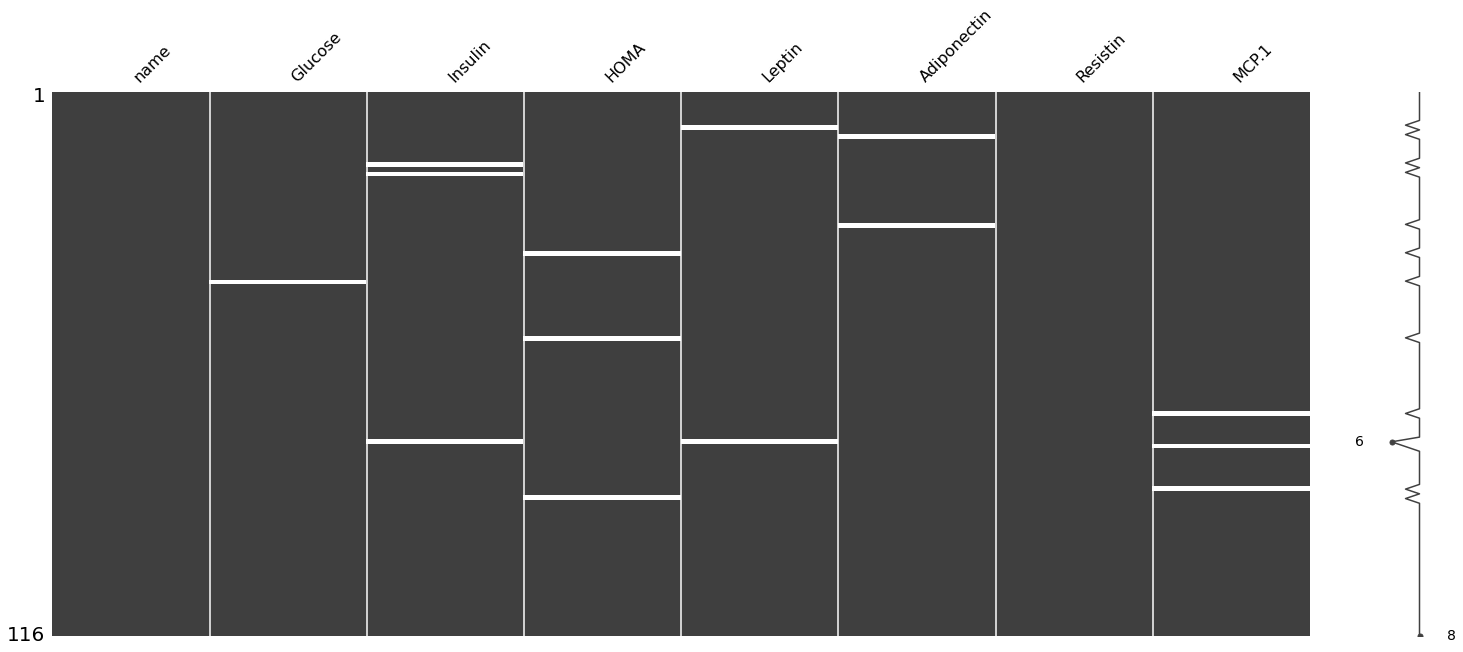

In [20]:
#visualise missing data
msno.matrix(tests_df)

In [21]:
tests_df.shape

(116, 8)

In [22]:
tests_df.isna().sum()

name           0
Glucose        1
Insulin        3
HOMA           3
Leptin         2
Adiponectin    2
Resistin       0
MCP.1          3
dtype: int64

In [25]:
tests_df = tests_df.dropna()

In [26]:
tests_df.shape

(103, 8)

<AxesSubplot:>

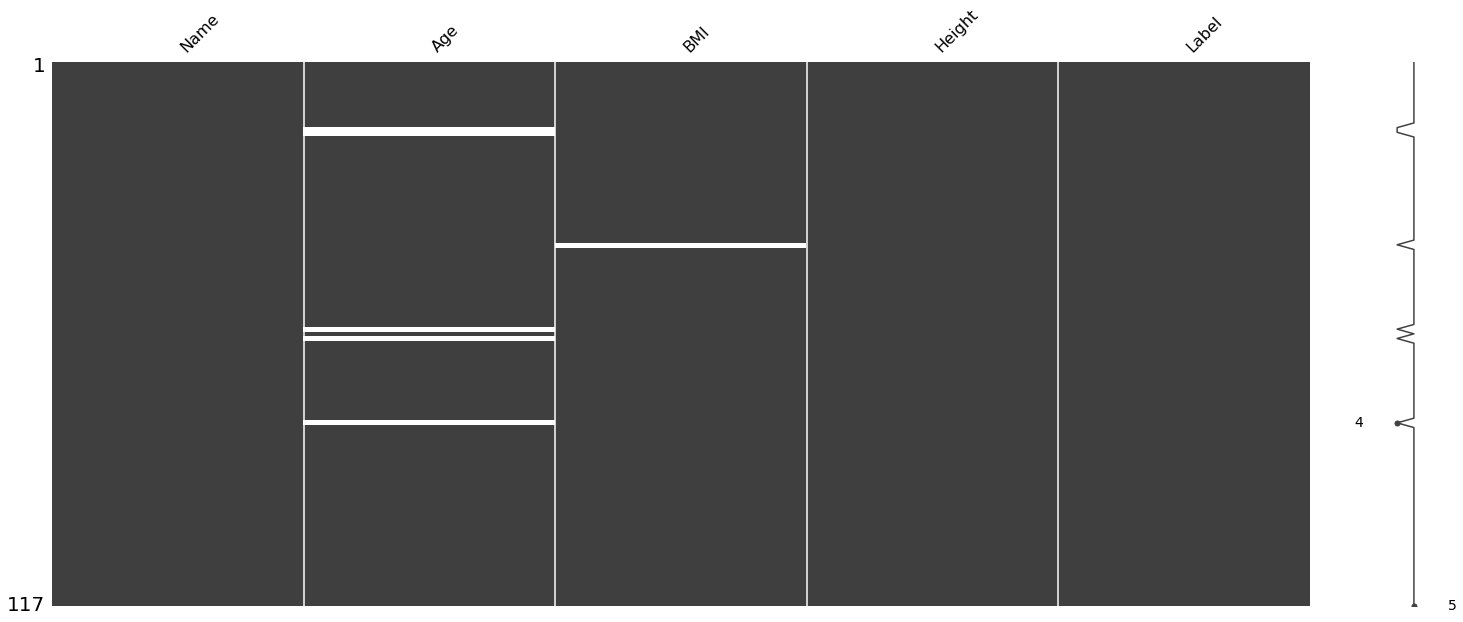

In [27]:
msno.matrix(metrics_df)

In [28]:
metrics_df.shape

(117, 5)

In [29]:
metrics_df.isna().sum()

Name      0
Age       5
BMI       1
Height    0
Label     0
dtype: int64

In [30]:
metrics_df =  metrics_df.dropna()

In [31]:
metrics_df.shape

(111, 5)

In [38]:
# merge on names
tests_df = tests_df.rename(columns={'name': 'Name'})
tests_df

,Name,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,Maisha Snow,92.0,3.330,0.755688,54.6800,12.100000,10.96000,268.230
1,Luisa Jones,78.0,2.640,0.507936,6.3339,3.886145,22.94254,737.672
2,Saba Hail,82.0,2.820,0.570392,24.9600,33.750000,3.27000,392.460
3,Corey Hendrix,86.0,7.553,1.600000,14.0900,20.320000,7.64000,63.610
4,Grady Becker,84.0,2.869,0.590000,26.6500,38.040000,3.32000,191.720
...,...,...,...,...,...,...,...,...
111,Caitlan Beard,95.0,12.548,2.940415,33.1612,2.364950,9.95420,655.834
112,Nabilah Mcgill,105.0,4.420,1.144780,21.7800,17.860000,4.82000,195.940
113,Mackenzie Devine,103.0,2.432,0.617890,14.3224,6.783870,26.01360,293.123
114,Angelica Stevens,87.0,30.212,6.483495,29.2739,6.268540,24.24591,764.667


In [39]:
merge_df = metrics_df.merge(tests_df, on='Name')

In [40]:
merge_df

,Name,Age,BMI,Height,Label,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,Huda Mcpherson,36.0,34.174890,163,1,80.0,6.590,1.300427,10.2809,5.065915,15.72187,581.313
1,Cassidy Hayes,75.0,30.480000,192,2,152.0,7.010,2.628283,50.5300,10.060000,11.73000,99.450
2,Arwen Kendall,78.0,25.300000,157,1,60.0,3.508,0.519184,6.6330,10.567295,4.66380,209.749
3,Nathanael Robin,45.0,21.303949,169,2,102.0,13.852,3.485163,7.6476,21.056625,23.03408,552.444
4,Tahmina Carty,34.0,24.242424,177,2,92.0,21.699,4.924226,16.7353,21.823745,12.06534,481.949
...,...,...,...,...,...,...,...,...,...,...,...,...
93,Caitlan Beard,57.0,34.838148,189,2,95.0,12.548,2.940415,33.1612,2.364950,9.95420,655.834
94,Nabilah Mcgill,72.0,23.620000,165,2,105.0,4.420,1.144780,21.7800,17.860000,4.82000,195.940
95,Mackenzie Devine,40.0,27.636054,173,2,103.0,2.432,0.617890,14.3224,6.783870,26.01360,293.123
96,Angelica Stevens,52.0,30.801249,185,2,87.0,30.212,6.483495,29.2739,6.268540,24.24591,764.667


In [42]:
# dupliates?
merge_df = merge_df.drop_duplicates(subset ="Name") 

<AxesSubplot:>

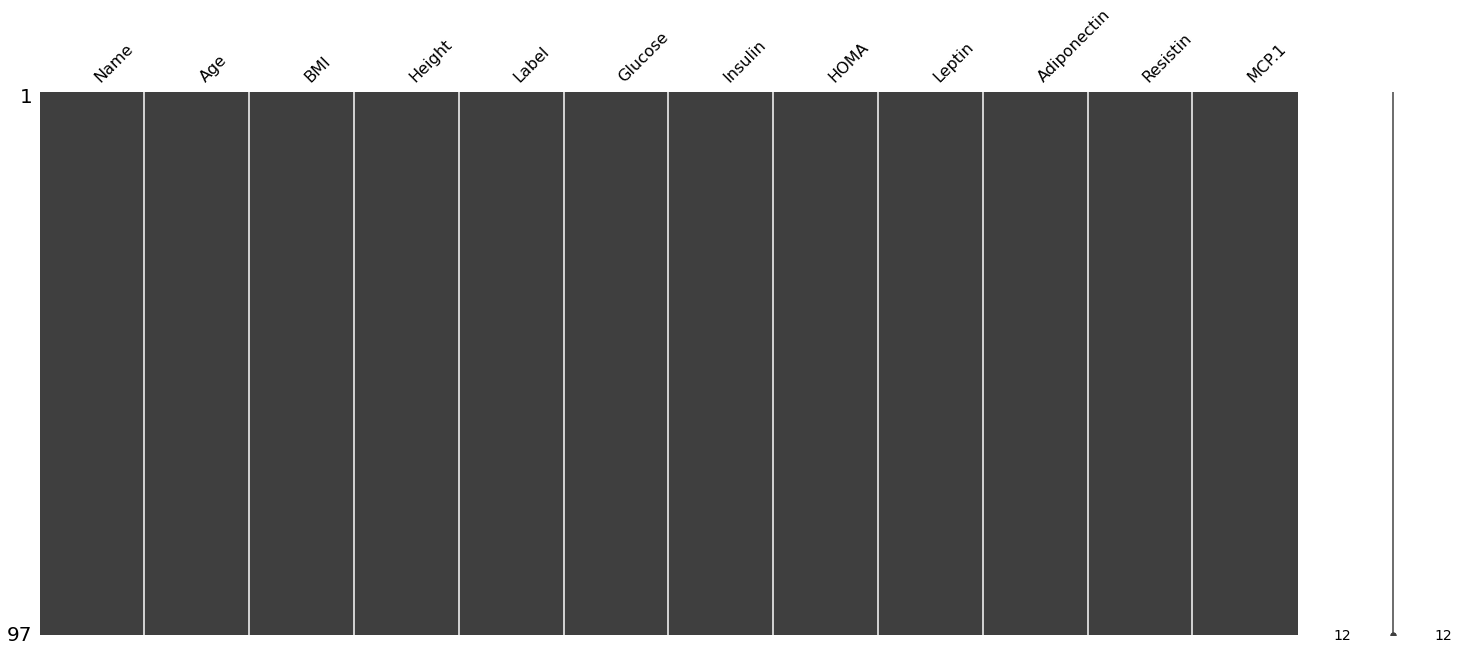

In [44]:
msno.matrix(merge_df)

In [58]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 97
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         97 non-null     object 
 1   Age          97 non-null     float64
 2   BMI          97 non-null     float64
 3   Height       97 non-null     int64  
 4   Label        97 non-null     int64  
 5   Glucose      97 non-null     float64
 6   Insulin      97 non-null     float64
 7   HOMA         97 non-null     float64
 8   Leptin       97 non-null     float64
 9   Adiponectin  97 non-null     float64
 10  Resistin     97 non-null     float64
 11  MCP.1        97 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 9.9+ KB


In [59]:
merge_df.to_csv('cleaned_df.csv')